<a href="https://colab.research.google.com/github/tmmridho/assignment1_hactiv8/blob/main/PYIM_Assgn_1_008_Teuku_Muhammad_Mifdhal_Ridho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import google colab lib and upload file

In [107]:
# Import google colab lib

In [108]:
from google.colab import files

In [109]:
# Upload files

In [110]:
student_por = files.upload()

Saving student-por.csv to student-por (1).csv


In [111]:
student_mat = files.upload()

Saving student-mat.csv to student-mat (1).csv


# Import libraries

In [210]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [211]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Read dataset

In [212]:
df_student_por = pd.read_csv(io.BytesIO(student_por['student-por.csv']))

In [213]:
df_student_mat = pd.read_csv(io.BytesIO(student_mat['student-mat.csv']))

In [214]:
df_student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [215]:
df_student_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


# Clean data

In [216]:
df_student_mat.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [217]:
df_student_por.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# Encode Data

In [218]:
df_student_mat_expand = pd.get_dummies(df_student_mat, columns=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'])

In [219]:
df_student_por_expand = pd.get_dummies(df_student_por, columns=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'])

In [220]:
df_student_mat_expand.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0


In [221]:
df_student_por_expand.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0


# Check Data Correlation

In [222]:
corrmatrix_por = df_student_por_expand.corr()
y_corr = corrmatrix_por.loc['Dalc']
y_corr

age                  0.134768
Medu                -0.007018
Fedu                 0.000061
traveltime           0.092824
studytime           -0.137585
failures             0.105949
famrel              -0.075767
freetime             0.109904
goout                0.245126
Dalc                 1.000000
Walc                 0.616561
health               0.059067
absences             0.172952
G1                  -0.195171
G2                  -0.189480
G3                  -0.204719
school_GP           -0.047169
school_MS            0.047169
sex_F               -0.282696
sex_M                0.282696
address_R            0.047304
address_U           -0.047304
famsize_GT3         -0.060482
famsize_LE3          0.060482
Pstatus_A           -0.041513
Pstatus_T            0.041513
Mjob_at_home        -0.003336
Mjob_health         -0.077160
Mjob_other          -0.019067
Mjob_services        0.056067
Mjob_teacher         0.025662
Fjob_at_home        -0.034544
Fjob_health         -0.004988
Fjob_other

# Drop unrelated columns

In [223]:
df_student_por_fix = df_student_por_expand.drop(columns=['Medu','Fedu','traveltime','famrel','Walc','health','school_GP','school_MS','address_R','address_U','famsize_GT3','famsize_LE3',
                                            'Pstatus_A','Pstatus_T','Mjob_at_home','Mjob_health','Mjob_other','Mjob_services','Mjob_teacher','Fjob_at_home','Fjob_health','Fjob_other',
                                            'Fjob_services','Fjob_teacher','reason_course','reason_home','reason_other','reason_reputation','guardian_father','guardian_mother',
                                            'guardian_other','schoolsup_no','schoolsup_yes','famsup_no','famsup_yes','paid_no','paid_yes','activities_no','activities_yes','nursery_no',
                                            'nursery_yes','internet_no','internet_yes','romantic_no','romantic_yes'])


# Split dataset into train and test

In [224]:
train_dataset = df_student_por_fix.sample(frac=0.8, random_state=0)
test_dataset = df_student_por_fix.drop(train_dataset.index)

# Inspect data

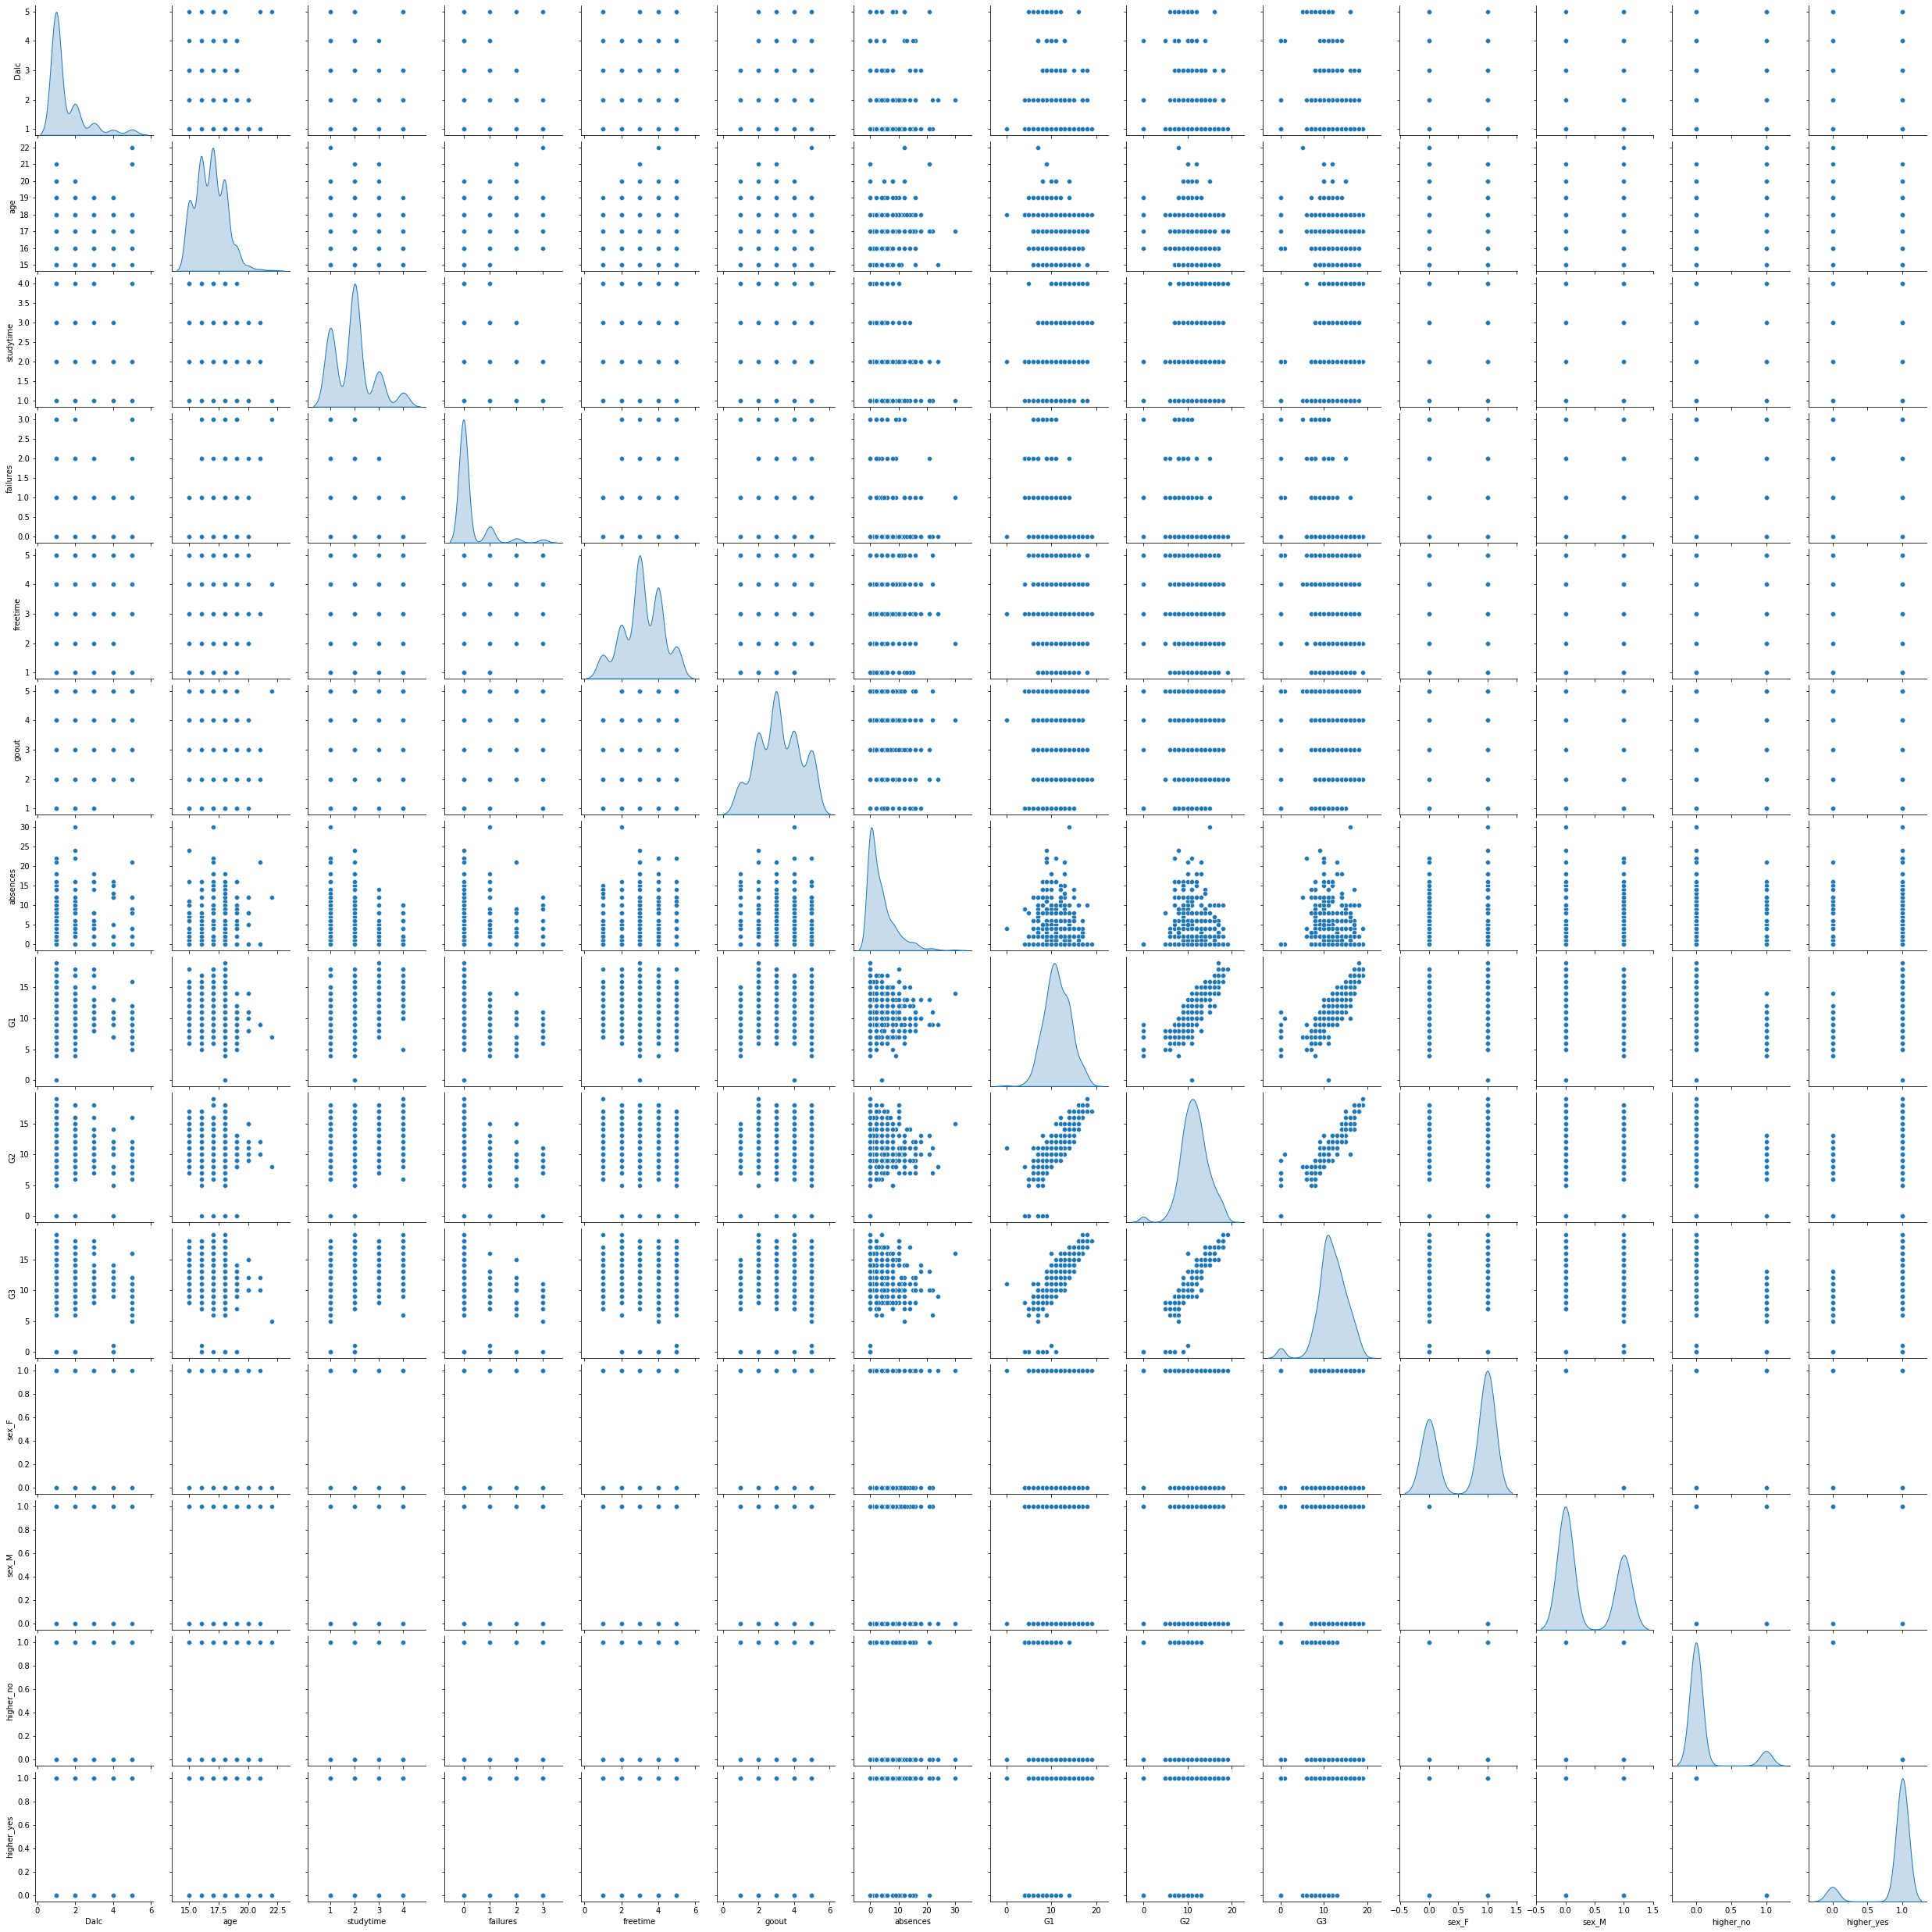

In [128]:
sns.pairplot(train_dataset[['Dalc', 'age', 'studytime', 'failures', 'freetime', 'goout', 'absences', 'G1', 'G2', 'G3', 'sex_F', 'sex_M', 'higher_no', 'higher_yes']], diag_kind='kde')

In [225]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,519.0,16.789981,1.236594,15.0,16.0,17.0,18.0,22.0
studytime,519.0,1.938343,0.822027,1.0,1.0,2.0,2.0,4.0
failures,519.0,0.231214,0.602848,0.0,0.0,0.0,0.0,3.0
freetime,519.0,3.165703,1.052437,1.0,3.0,3.0,4.0,5.0
goout,519.0,3.173410,1.184189,1.0,2.0,3.0,4.0,5.0
Dalc,519.0,1.520231,0.964162,1.0,1.0,1.0,2.0,5.0
absences,519.0,3.618497,4.656639,0.0,0.0,2.0,6.0,30.0
G1,519.0,11.344894,2.817233,0.0,9.0,11.0,13.0,19.0
G2,519.0,11.516378,3.026782,0.0,10.0,11.0,13.0,19.0
G3,519.0,11.843931,3.314400,0.0,10.0,12.0,14.0,19.0


# Split features from labels

In [226]:
train_x_por = train_dataset.copy()
train_y_por = train_x_por.pop('Dalc')

test_x_por = test_dataset.copy()
test_y_por = test_x_por.pop('Dalc')

# Normalization

In [227]:
train_x_por.describe().transpose()[['mean', 'std']]

,mean,std
age,16.789981,1.236594
studytime,1.938343,0.822027
failures,0.231214,0.602848
freetime,3.165703,1.052437
goout,3.173410,1.184189
absences,3.618497,4.656639
G1,11.344894,2.817233
G2,11.516378,3.026782
G3,11.843931,3.314400
sex_F,0.622351,0.485267


In [228]:
normalizer = preprocessing.Normalization()

In [229]:
normalizer.adapt(np.array(train_x_por))

In [230]:
print(normalizer.mean.numpy())

[16.78998     1.9383429   0.2312139   3.1657035   3.173411    3.6184976
 11.344894   11.516377   11.843932    0.6223507   0.37764928  0.10597304
  0.89402705]


# Linear Regression

In [231]:
first = np.array(train_x_por[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[16  2  0  2  2  2  9  7  8  0  1  0  1]]

Normalized: [[-0.64  0.08 -0.38 -1.11 -0.99 -0.35 -0.83 -1.49 -1.16 -1.28  1.28 -0.34
   0.34]]


In [232]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [233]:
linear_model.predict(train_x_por[:10])

array([[-0.99070513],
       [ 0.6894351 ],
       [-1.3254572 ],
       [ 1.1006168 ],
       [ 0.37247294],
       [ 0.91771543],
       [ 0.5496433 ],
       [ 0.83672214],
       [-1.2339929 ],
       [ 0.2994581 ]], dtype=float32)

In [234]:
linear_model.layers[1].kernel

<tf.Variable 'dense_47/kernel:0' shape=(13, 1) dtype=float32, numpy=
array([[ 0.4460261 ],
       [-0.25144917],
       [-0.2784744 ],
       [ 0.4924295 ],
       [-0.3766068 ],
       [-0.16726282],
       [ 0.46718895],
       [-0.0486269 ],
       [-0.33494002],
       [ 0.08241093],
       [-0.5934232 ],
       [ 0.01224524],
       [ 0.34936583]], dtype=float32)>

In [235]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [236]:
%%time
history = linear_model.fit(
    train_x_por, train_y_por, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 3.84 s, sys: 185 ms, total: 4.02 s
Wall time: 3.97 s


In [237]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 5])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

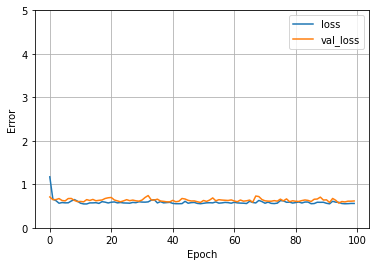

In [143]:
plot_loss(history)

In [144]:
test_results = {}

In [145]:
test_results['linear_model'] = linear_model.evaluate(
    test_x_por, test_y_por, verbose=0)

In [146]:
test_results

{'linear_model': 0.5140463709831238}

# DNN Regression

In [201]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(10, activation='relu'),
      layers.Dense(8, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [202]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 13)                27        
_________________________________________________________________
dense_44 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 9         
Total params: 264
Trainable params: 237
Non-trainable params: 27
_________________________________________________________________


In [203]:
%%time
history = dnn_model.fit(
    train_x_por, train_y_por,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 4.33 s, sys: 191 ms, total: 4.52 s
Wall time: 5.54 s


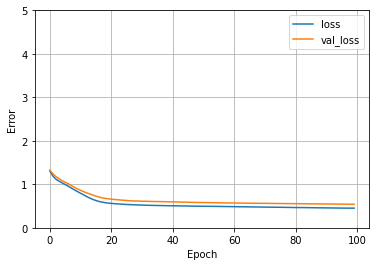

In [204]:
plot_loss(history)

In [205]:
test_results['dnn_model'] = dnn_model.evaluate(test_x_por, test_y_por, verbose=0)

In [206]:
test_results

{'dnn_model': 0.45337700843811035, 'linear_model': 0.5140463709831238}

In [207]:
pd.DataFrame(test_results, index=['Mean absolute error']).T

,Mean absolute error
linear_model,0.514046
dnn_model,0.453377


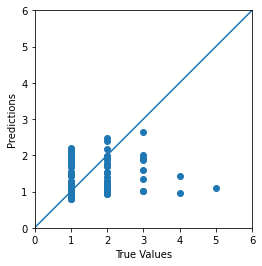

In [208]:
test_predictions = dnn_model.predict(test_x_por).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_y_por, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 6]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

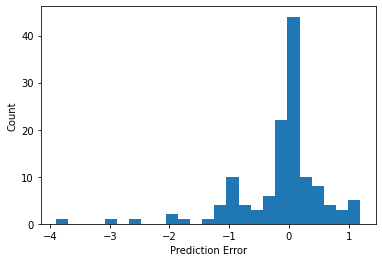

In [209]:
error = test_predictions - test_y_por
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')